In [271]:
import sklearn
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from statistics import median, mean
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier,RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, make_scorer

In [272]:
dir = "data/"

employee_survey = pd.read_csv(dir + "employee_survey_data.csv")
general = pd.read_csv(dir + "general_data.csv")
manager_survey = pd.read_csv(dir + "manager_survey_data.csv")
in_time = pd.read_csv(dir + "in_time.csv")
out_time = pd.read_csv(dir + "out_time.csv")

# Sommaire

<ul>
    <li><a href="#es">Employe survey</a></li>
    <li><a href="#ge">General</a></li>
    <li><a href="#ms">Manager survey</a></li>
    <li><a href="#it">In Time</a></li>
    <li><a href="#ot">Out Time</a></li>
    <li><a href="#ld">Lien entre les dataset</a></li>
    <li><a href="#cc">Conclusion</a></li>
</ul>

# Définition des variables globales

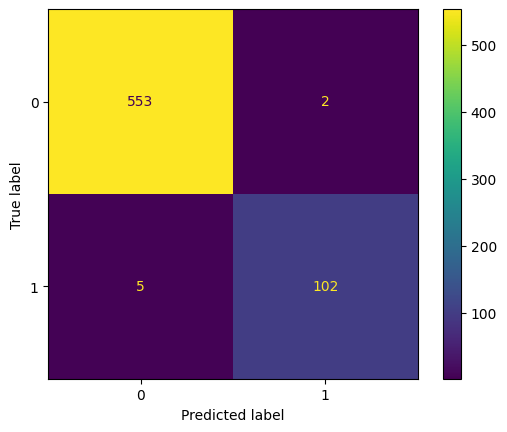

In [328]:
dtc_cm = confusion_matrix(y_test, y_pred)
dtc_cmd = ConfusionMatrixDisplay(confusion_matrix=dtc_cm,
                       display_labels=[0,1])

dtc_cmd.plot()
plt.show()


In [329]:


dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, splitter="random")

# Entraîner le modèle sur les données d'apprentissage
dtc.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred_dtc = dtc.predict(x_test)

In [330]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [331]:
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC score:", roc_auc)

Accuracy: 0.9894259818731118
F1 score: 0.966824644549763
Precision: 0.9807692307692307
Recall: 0.9532710280373832
ROC AUC score: 0.9748337122168899


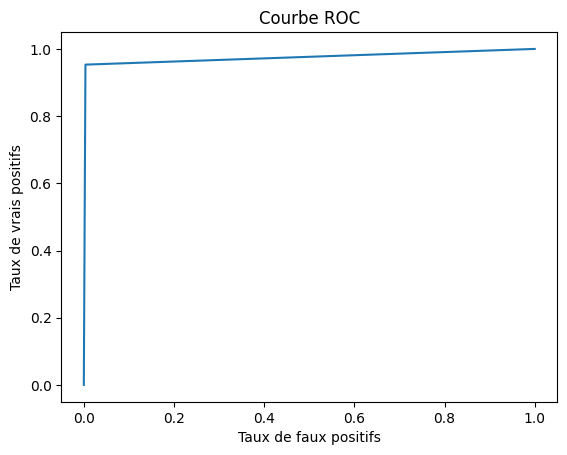

In [332]:
plt.plot(fpr, tpr)
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()

### HistGradientBoostingClassifier

In [333]:
pipeline_hist_gradient_boosting_classifier = Pipeline(steps=[
    ('classifier', HistGradientBoostingClassifier())
])

In [334]:
learning_rate = [0.1,0.2]
max_depth = [10,15,20]
#loss = ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy']
max_iter = [10,20,50,100]

parameters_hgbc = dict(classifier__learning_rate=learning_rate,
                  classifier__max_depth=max_depth,
                  #classifier__loss=loss,
                  classifier__max_iter=max_iter
                  )

In [335]:
hgbc_GS = GridSearchCV(pipeline_hist_gradient_boosting_classifier, parameters_hgbc)
hgbc_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        HistGradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.1, 0.2],
                         'classifier__max_depth': [10, 15, 20],
                         'classifier__max_iter': [10, 20, 50, 100]})

In [336]:
pd.DataFrame.from_dict(hgbc_GS.cv_results_).sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,1.356587,0.034962,0.006926,0.000494,0.2,10,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.981333,0.989333,0.986667,0.990654,0.981308,0.985859,0.003922,1
19,1.434081,0.027585,0.007221,0.000879,0.2,15,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.976000,0.984000,0.988000,0.987984,0.987984,0.984794,0.004660,2
23,1.398216,0.010848,0.007513,0.001231,0.2,20,100,"{'classifier__learning_rate': 0.2, 'classifier...",0.970667,0.985333,0.984000,0.991989,0.990654,0.984529,0.007567,3
11,1.411354,0.050574,0.007415,0.000584,0.1,20,100,"{'classifier__learning_rate': 0.1, 'classifier...",0.976000,0.976000,0.980000,0.983979,0.985314,0.980258,0.003892,4
14,0.699602,0.048535,0.005219,0.000404,0.2,10,50,"{'classifier__learning_rate': 0.2, 'classifier...",0.973333,0.977333,0.980000,0.986649,0.981308,0.979725,0.004407,5


In [337]:
hgbc = HistGradientBoostingClassifier(learning_rate=0.2, max_depth=20, max_iter=100)
hgbc.fit(x_train, y_train)

y_pred_hgbc = hgbc.predict(x_test)

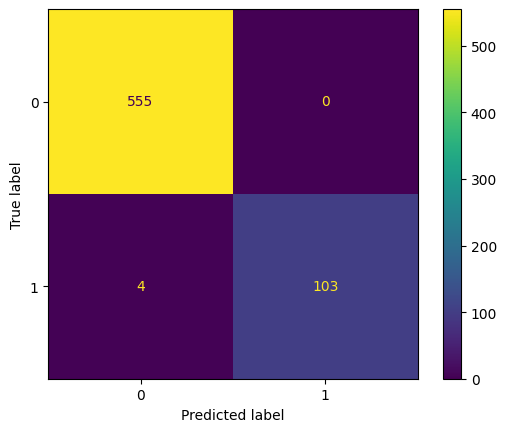

In [338]:
hgbc_cm = confusion_matrix(y_test, y_pred_hgbc)
hgbc_cmd = ConfusionMatrixDisplay(confusion_matrix=hgbc_cm,
                       display_labels=[0,1])

hgbc_cmd.plot()
plt.show()

### RandomForestClassifier

In [339]:
pipeline_random_forest_classifier = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

In [340]:
n_estimators = [1,2,3,5,10]
criterion = ['gini', 'entropy']
max_depth = [10,14,18,22,24]


parameters_rfc = dict(classifier__n_estimators=n_estimators,
                  classifier__criterion=criterion,
                  classifier__max_depth=max_depth
                  )

In [341]:
rfc_GS = GridSearchCV(pipeline_random_forest_classifier, parameters_rfc)
rfc_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 14, 18, 22, 24],
                         'classifier__n_estimators': [1, 2, 3, 5, 10]})

In [342]:
pd.DataFrame.from_dict(rfc_GS.cv_results_).sort_values(by=['rank_test_score']).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
39,0.065360,0.001926,0.004107,0.000669,entropy,18,10,"{'classifier__criterion': 'entropy', 'classifi...",0.960000,0.948000,0.968000,0.967957,0.967957,0.962383,0.007826,1
44,0.070087,0.003658,0.003926,0.000698,entropy,22,10,"{'classifier__criterion': 'entropy', 'classifi...",0.960000,0.956000,0.961333,0.963952,0.959947,0.960246,0.002573,2
49,0.064639,0.001668,0.004405,0.000376,entropy,24,10,"{'classifier__criterion': 'entropy', 'classifi...",0.961333,0.949333,0.953333,0.969292,0.965287,0.959716,0.007401,3
24,0.058453,0.002455,0.003802,0.000402,gini,24,10,"{'classifier__criterion': 'gini', 'classifier_...",0.960000,0.957333,0.954667,0.963952,0.954606,0.958112,0.003534,4
23,0.030479,0.001239,0.003208,0.000507,gini,24,5,"{'classifier__criterion': 'gini', 'classifier_...",0.941333,0.953333,0.949333,0.965287,0.966622,0.955182,0.009617,5
14,0.057494,0.002348,0.003609,0.000371,gini,18,10,"{'classifier__criterion': 'gini', 'classifier_...",0.940000,0.954667,0.948000,0.970628,0.961282,0.954915,0.010562,6
43,0.037589,0.002412,0.003203,0.000679,entropy,22,5,"{'classifier__criterion': 'entropy', 'classifi...",0.949333,0.960000,0.950667,0.971963,0.941255,0.954644,0.010506,7
9,0.076546,0.010025,0.005232,0.000949,gini,14,10,"{'classifier__criterion': 'gini', 'classifier_...",0.946667,0.944000,0.961333,0.963952,0.954606,0.954112,0.007835,8
34,0.063344,0.001689,0.004023,0.000446,entropy,14,10,"{'classifier__criterion': 'entropy', 'classifi...",0.958667,0.938667,0.958667,0.959947,0.954606,0.954111,0.007929,9
19,0.057839,0.004944,0.003797,0.000747,gini,22,10,"{'classifier__criterion': 'gini', 'classifier_...",0.953333,0.961333,0.938667,0.961282,0.954606,0.953844,0.008278,10


In [343]:
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=24)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

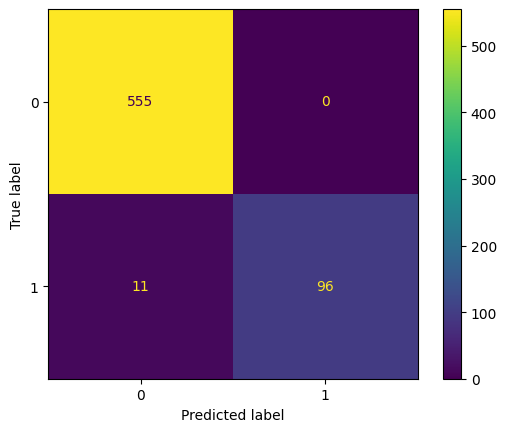

In [344]:
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_cmd = ConfusionMatrixDisplay(confusion_matrix=rfc_cm,
                       display_labels=[0,1])

rfc_cmd.plot()
plt.show()

### Perceptron

In [345]:
pipeline_Perceptron = Pipeline(steps=[
    ('classifier', Perceptron())
])

In [346]:
penalty = ['l2','l1','elasticnet']
alpha = [0.0001,0.0002,0.0003]


parameters_pe = dict(classifier__penalty=penalty,
                  classifier__alpha=alpha)


In [347]:
pe_GS = GridSearchCV(pipeline_Perceptron, parameters_pe)
pe_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier', Perceptron())]),
             param_grid={'classifier__alpha': [0.0001, 0.0002, 0.0003],
                         'classifier__penalty': ['l2', 'l1', 'elasticnet']})

In [348]:
pd.DataFrame.from_dict(pe_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006834,0.000872,0.002602,0.000801,0.0001,l2,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
1,0.010747,0.001631,0.002207,0.000684,0.0001,l1,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
2,0.010455,0.001681,0.002710,0.000400,0.0001,elasticnet,"{'classifier__alpha': 0.0001, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
3,0.006449,0.000718,0.002305,0.000400,0.0002,l2,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
4,0.009922,0.001018,0.001702,0.000400,0.0002,l1,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
5,0.009231,0.000988,0.002101,0.000207,0.0002,elasticnet,"{'classifier__alpha': 0.0002, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
6,0.009220,0.001934,0.003521,0.000716,0.0003,l2,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
7,0.013489,0.002672,0.002935,0.000810,0.0003,l1,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1
8,0.011656,0.001661,0.002305,0.000396,0.0003,elasticnet,"{'classifier__alpha': 0.0003, 'classifier__pen...",0.838667,0.838667,0.838667,0.839786,0.838451,0.838848,0.000477,1


In [358]:
pe = Perceptron(alpha=0.0001,penalty='l2',)
pe.fit(x_train, y_train)
y_pred_pe = pe.predict(x_test)

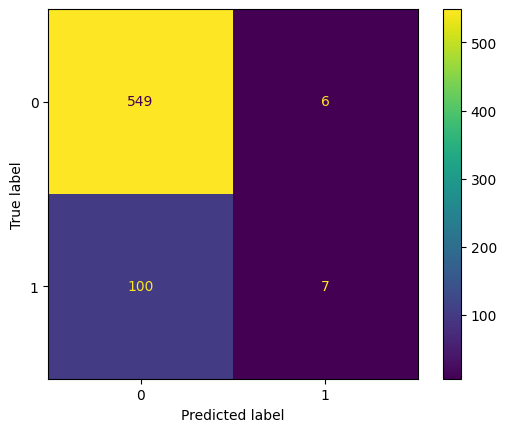

In [359]:
pe_cm = confusion_matrix(y_test, y_pred)
pe_cmd = ConfusionMatrixDisplay(confusion_matrix=pe_cm,
                       display_labels=[0,1])

pe_cmd.plot()
plt.show()

### Logistic Regression

In [349]:
pipeline_LogisticRegression = Pipeline(steps=[
    ('classifier', LogisticRegression())
])

In [350]:
penalty = ['l2']
max_iter = [200,300,400,500,600,700,800,900,1000]

parameters = dict(classifier__penalty = penalty, classifier__max_iter = max_iter)

In [351]:
lr_GS = GridSearchCV(pipeline_LogisticRegression, parameters)
lr_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid={'classifier__max_iter': [200, 300, 400, 500, 600, 700,
                                                  800, 900, 1000],
                         'classifier__penalty': ['l2']})

In [352]:
pd.DataFrame.from_dict(lr_GS.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_iter,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050379,0.015316,0.002409,0.000581,200,l2,"{'classifier__max_iter': 200, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
1,0.047403,0.016315,0.002208,0.000254,300,l2,"{'classifier__max_iter': 300, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
2,0.049488,0.014079,0.001911,0.000373,400,l2,"{'classifier__max_iter': 400, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
3,0.045468,0.014882,0.002304,0.000598,500,l2,"{'classifier__max_iter': 500, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
4,0.055283,0.026883,0.002203,0.000400,600,l2,"{'classifier__max_iter': 600, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
5,0.044936,0.015256,0.002201,0.000400,700,l2,"{'classifier__max_iter': 700, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
6,0.044588,0.015306,0.002086,0.000171,800,l2,"{'classifier__max_iter': 800, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
7,0.044424,0.014551,0.002073,0.000143,900,l2,"{'classifier__max_iter': 900, 'classifier__pen...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1
8,0.044317,0.015024,0.002404,0.000486,1000,l2,"{'classifier__max_iter': 1000, 'classifier__pe...",0.838667,0.845333,0.838667,0.839786,0.849132,0.842317,0.004209,1


In [353]:
lr = LogisticRegression(penalty='l2', max_iter=200)
lr.fit(x_test, y_test)

y_pred = lr.predict(x_test)

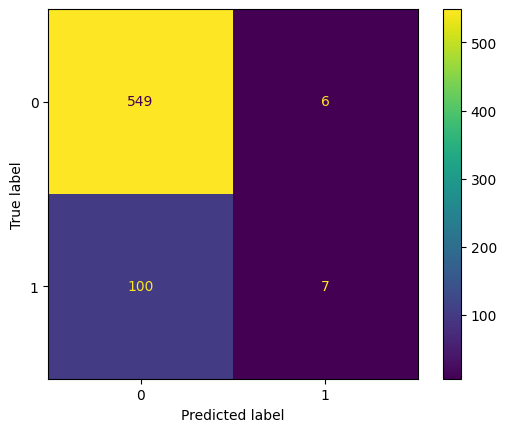

In [354]:
lr_cm = confusion_matrix(y_test, y_pred)
lr_cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm,
                       display_labels=[0,1])

lr_cmd.plot()
plt.show()

# Analyse des résultats

### Decsision Tree Classifier

In [355]:
feature_names = pipeline_dtc[:-1].get_feature_names_out()

cl = list(zip(x_train.columns, dtc.feature_importances_))
coefs = pd.DataFrame(cl, columns = ['Column', 'Coefs'])
coefs.sort_values(by=['Coefs'], ascending=False)

,Column,Coefs
36,avg_hours_worked,0.100147
12,YearsWithCurrManager,0.086930
34,JobSatisfaction,0.067807
8,TotalWorkingYears,0.053476
33,EnvironmentSatisfaction,0.051678
17,Education_Life Sciences,0.046207
11,YearsSinceLastPromotion,0.045812
0,BusinessTravel,0.037931
5,NumCompaniesWorked,0.035950
1,DistanceFromHome,0.029623


In [361]:
feature_names = pipeline_dtc[:-1].get_feature_names_out()

cl = list(zip(x_train.columns, pe.coef_))
coefs = pd.DataFrame(cl, columns = ['Column', 'Coefs'])
coefs.sort_values(by=['Coefs'], ascending=False)

pe.coef_

array([[ 2.85799364e+02,  3.25715690e+02,  2.09182144e+02,
         1.05122990e+02,  7.13280798e+04,  5.38688214e+02,
         1.50294658e+03, -1.27845937e+01, -3.50049206e+03,
         1.70857576e-01, -2.36853729e+03, -3.45203714e+02,
        -1.62123939e+03,  5.72922651e+01,  4.55109599e+01,
        -2.50315866e+01,  4.47728268e+01,  6.39042857e+01,
         3.64571300e+00,  1.23238909e+01, -1.46177370e+01,
        -3.22573411e+01,  1.08194668e+00, -8.16814479e+00,
        -1.04612179e+00, -9.97689640e+00, -3.69068107e+01,
         3.67486235e+01,  4.73651526e+01,  4.74147410e+01,
         1.25914832e+00,  1.87954648e+02,  2.66636289e+02,
        -1.74852752e+02, -2.08381485e+02,  6.11227753e+01,
         1.52792740e+03,  2.31142047e+03,  7.77159545e+02]])

# Conclusion
<div id="cc"></div>

On remarque que l'étude sur le fait de se sentir bien ou non a un fort impact sur les démissions
On remarque aussi que le nombre d'heure travaillée a aussi un certain impacte sur les démissions